In [204]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.ar_model import AutoReg

In [205]:
data = pd.read_csv('Genshin_impact.csv',index_col=0,parse_dates=True)
data

,Android DAU,Apple DAU,Android installs,Apple installs,Android IAP,Apple iAP
event_date,,,,,,
2020-02-01,354409.6,323929.8,48552.0,24929.1,248952.0,509254.40
2020-02-02,326624.0,311472.0,47260.5,25720.2,103620.0,283522.80
2020-02-03,300012.8,280233.0,35532.0,19739.7,72019.2,214752.40
2020-02-04,298281.6,275931.9,35969.5,18157.5,93079.8,239944.40
2020-02-05,296556.8,273461.4,36820.0,17703.9,81754.2,212082.80
...,...,...,...,...,...,...
2021-01-27,343158.4,205113.6,50197.0,11615.4,69082.6,195978.19
2021-01-28,348000.0,204533.1,55793.5,12271.5,70873.1,127062.33
2021-01-29,351369.6,214814.7,56983.5,12549.6,149464.3,313677.45


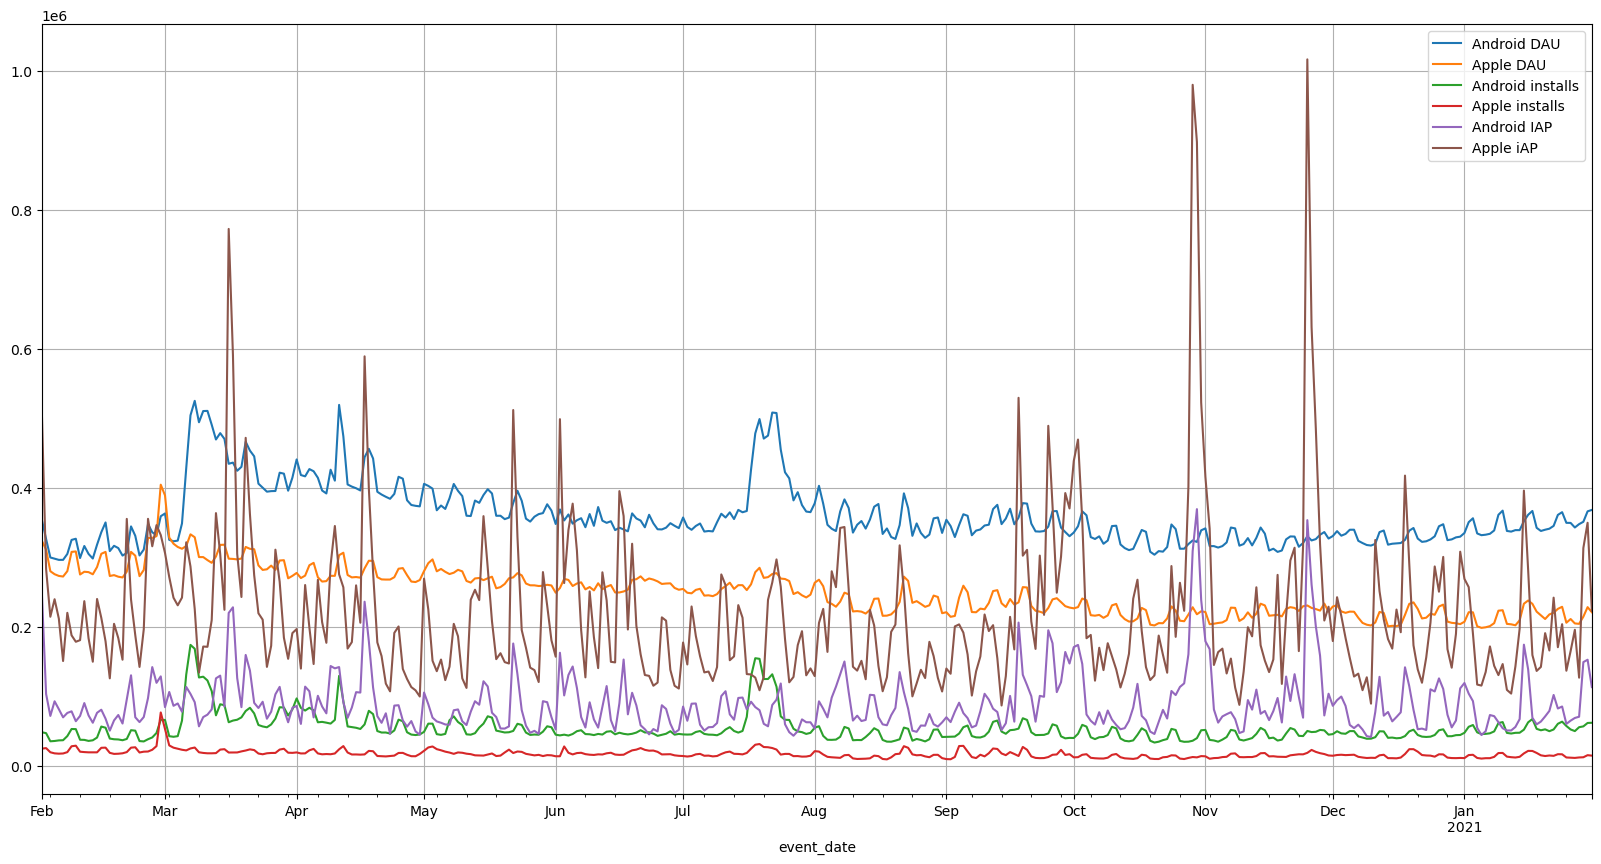

In [206]:
data.plot(figsize=(20,10))
plt.grid(True)

In [207]:
round(zscore(data).describe(),2)

,Android DAU,Apple DAU,Android installs,Apple installs,Android IAP,Apple iAP
count,366.00,366.00,366.00,366.00,366.00,366.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.44,-1.53,-0.97,-1.34,-1.12,-1.13
25%,-0.65,-0.84,-0.53,-0.62,-0.63,-0.66
50%,-0.27,-0.03,-0.26,-0.14,-0.27,-0.26
75%,0.35,0.64,0.13,0.35,0.31,0.33
max,3.76,4.57,5.88,10.10,6.42,6.70


# Frequency change

DAU -> mean

installs -> sum

IAP -> sum

In [208]:
data

,Android DAU,Apple DAU,Android installs,Apple installs,Android IAP,Apple iAP
event_date,,,,,,
2020-02-01,354409.6,323929.8,48552.0,24929.1,248952.0,509254.40
2020-02-02,326624.0,311472.0,47260.5,25720.2,103620.0,283522.80
2020-02-03,300012.8,280233.0,35532.0,19739.7,72019.2,214752.40
2020-02-04,298281.6,275931.9,35969.5,18157.5,93079.8,239944.40
2020-02-05,296556.8,273461.4,36820.0,17703.9,81754.2,212082.80
...,...,...,...,...,...,...
2021-01-27,343158.4,205113.6,50197.0,11615.4,69082.6,195978.19
2021-01-28,348000.0,204533.1,55793.5,12271.5,70873.1,127062.33
2021-01-29,351369.6,214814.7,56983.5,12549.6,149464.3,313677.45


In [209]:
data_monthly = data.resample('M').agg(
    {
        'Android DAU':'mean',
        'Apple DAU':'mean',
        'Android installs':'sum',
        'Apple installs':'sum',
        'Android IAP':'sum',
        'Apple iAP':'sum'
}
)

<AxesSubplot:xlabel='event_date'>

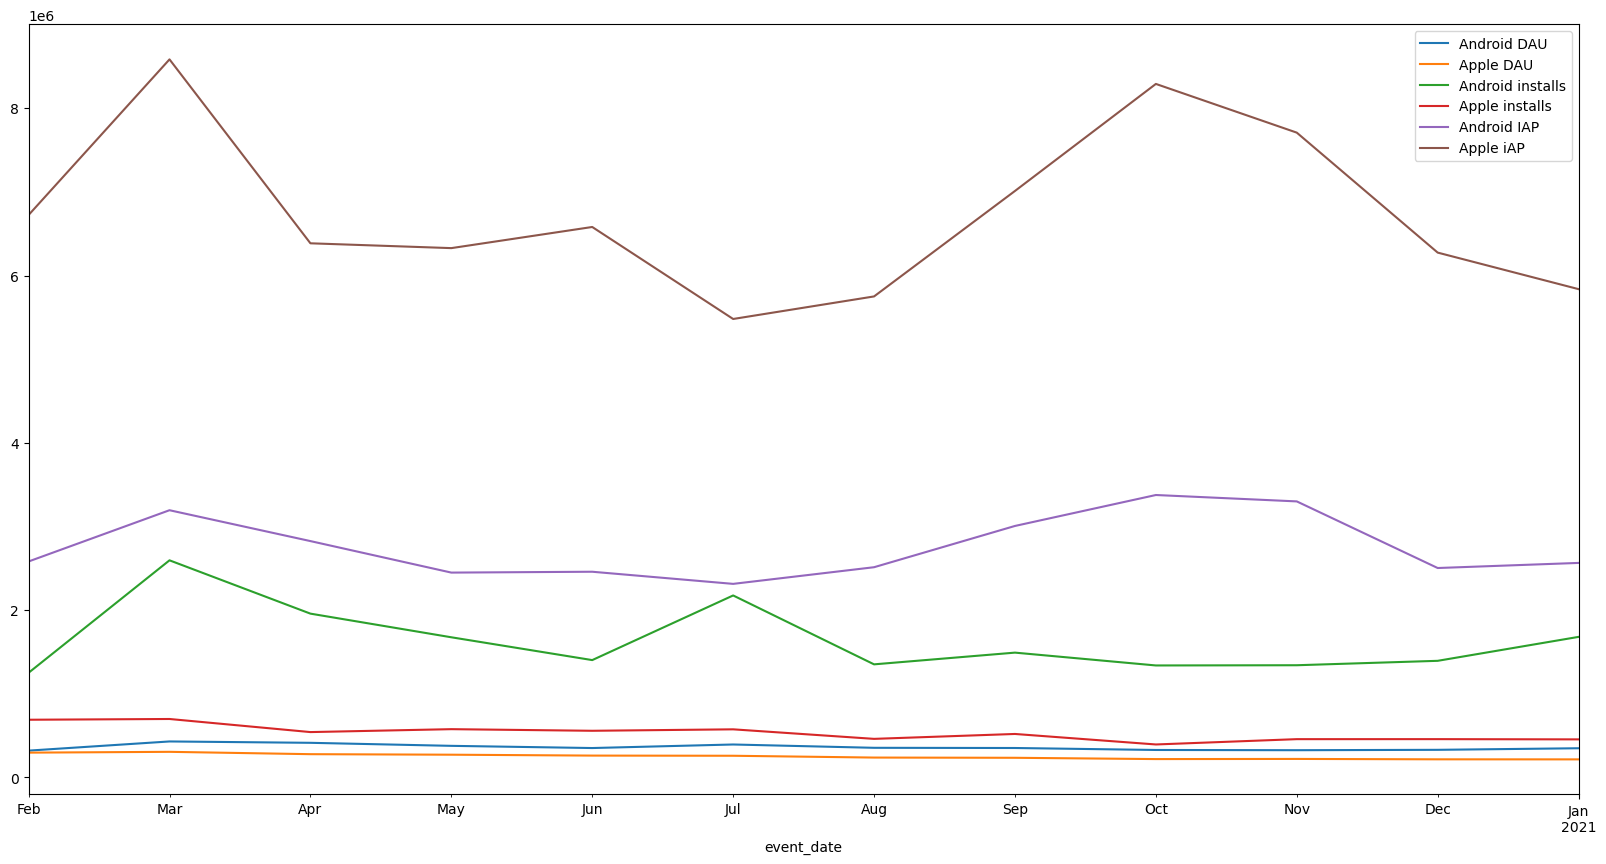

In [210]:
data_monthly.plot(figsize=(20,10))

## ADF test of the monthly data

We find that the DAU of Android and Apple are not a steady process, forcing us to do diferences to the data.

ADF test of the percent change of Android and Apple DAU passes!

In [211]:
for column in data_monthly.columns:
    print('ADF test of {}'.format(column))
    print(statsmodels.tsa.stattools.adfuller(data[column],maxlag=12))
    print('===='*20)

ADF test of Android DAU
(-2.5389103727766984, 0.10629170416130201, 12, 353, {'1%': -3.4490114443793214, '5%': -2.8697627072503757, '10%': -2.5711506161673716}, 7866.709677446669)
ADF test of Apple DAU
(-1.071438277103345, 0.7263265837642516, 12, 353, {'1%': -3.4490114443793214, '5%': -2.8697627072503757, '10%': -2.5711506161673716}, 7350.506013408709)
ADF test of Android installs
(-3.4739048874690006, 0.00868311505102899, 11, 354, {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}, 7415.753594070444)
ADF test of Apple installs
(-2.881627075626589, 0.04752661386549876, 12, 353, {'1%': -3.4490114443793214, '5%': -2.8697627072503757, '10%': -2.5711506161673716}, 6828.178726715142)
ADF test of Android IAP
(-6.559788565779918, 8.437540450678989e-09, 8, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, 8358.923511700315)
ADF test of Apple iAP
(-6.439057763904052, 1.625230478537567e-08, 7, 358, {'1%': -3.448748905151901, '5%': -2

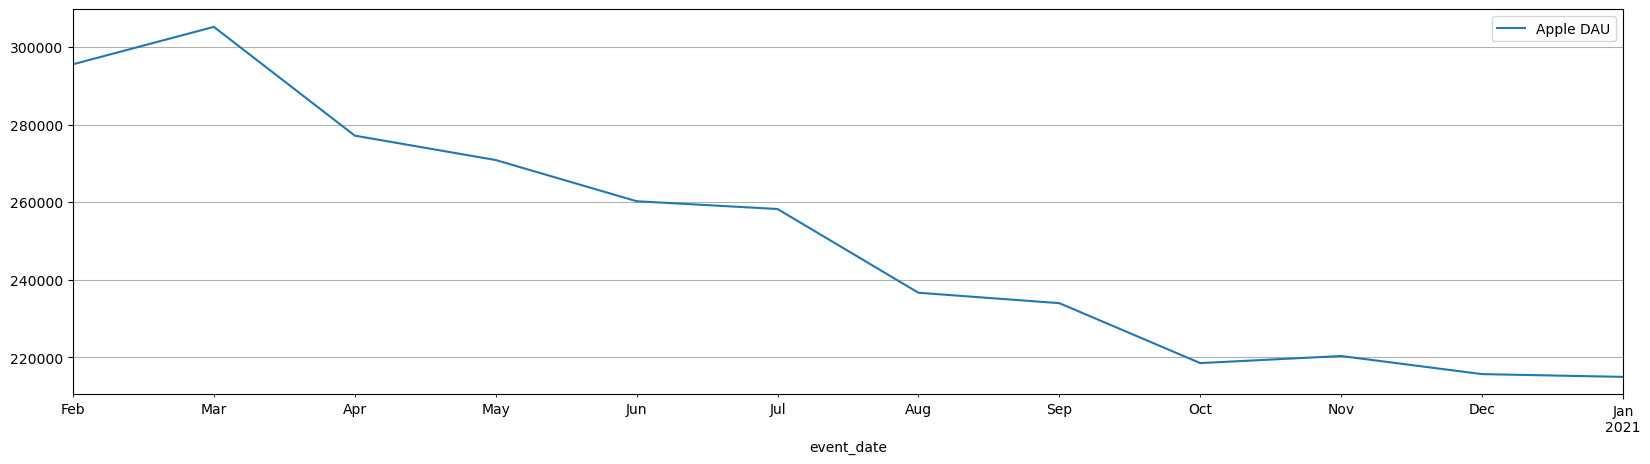

In [212]:
data_monthly[['Apple DAU']].plot(figsize=(20,5))
plt.grid(True)

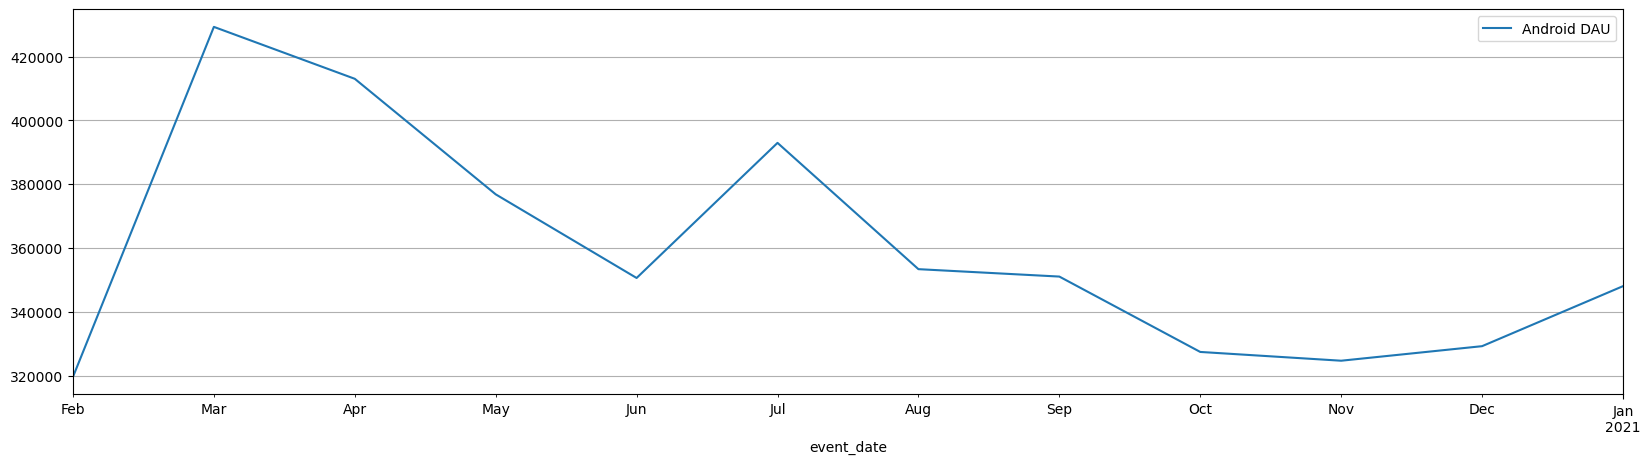

In [213]:
data_monthly[['Android DAU']].plot(figsize=(20,5))
plt.grid(True)

In [214]:
print('ADF test of percent change of Android DAU')
print(statsmodels.tsa.stattools.adfuller(data_monthly['Android DAU'].pct_change().dropna(),maxlag=3))
print('===='*20)
print('ADF test of percent change of Apple DAU')
print(statsmodels.tsa.stattools.adfuller(data_monthly['Apple DAU'].pct_change().dropna(),maxlag=3))
print('===='*20)

ADF test of percent change of Android DAU
(-6.30058065345889, 3.420072369715233e-08, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, -16.23529511957037)
ADF test of percent change of Apple DAU
(-6.7152696875938815, 3.5952869538821023e-09, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, -26.89124657311841)


In [215]:
data_monthly['Android DAU(pct)']=data_monthly['Android DAU'].pct_change()
data_monthly['Apple DAU(pct)']=data_monthly['Apple DAU'].pct_change()

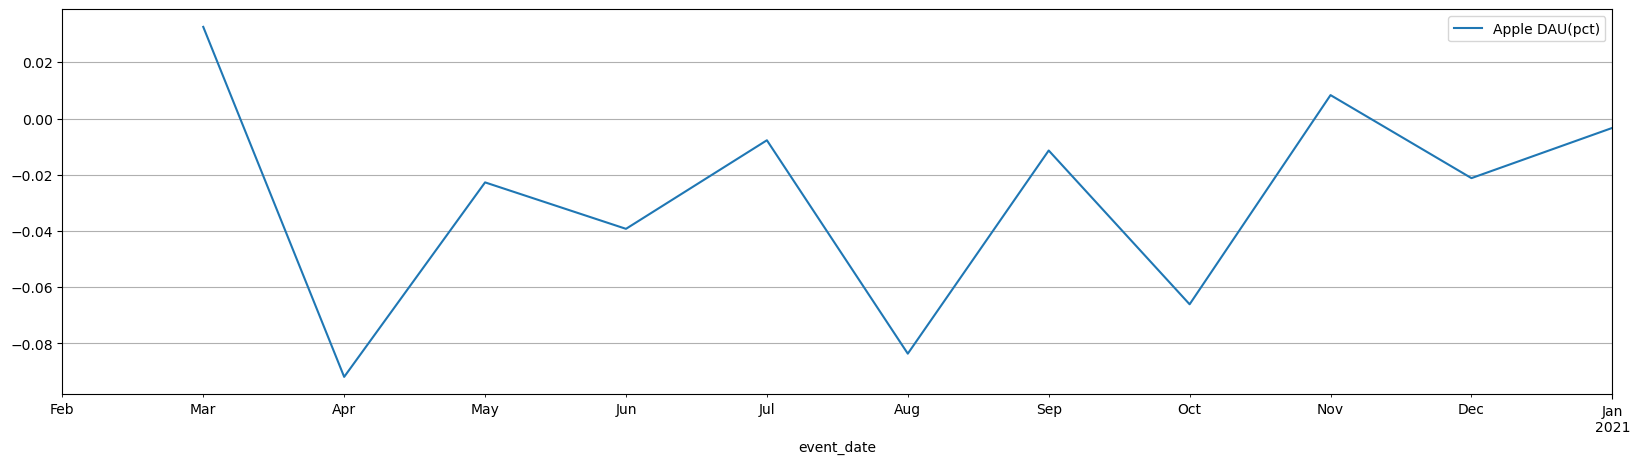

In [216]:
data_monthly[['Apple DAU(pct)']].plot(figsize=(20,5))
plt.grid(True)

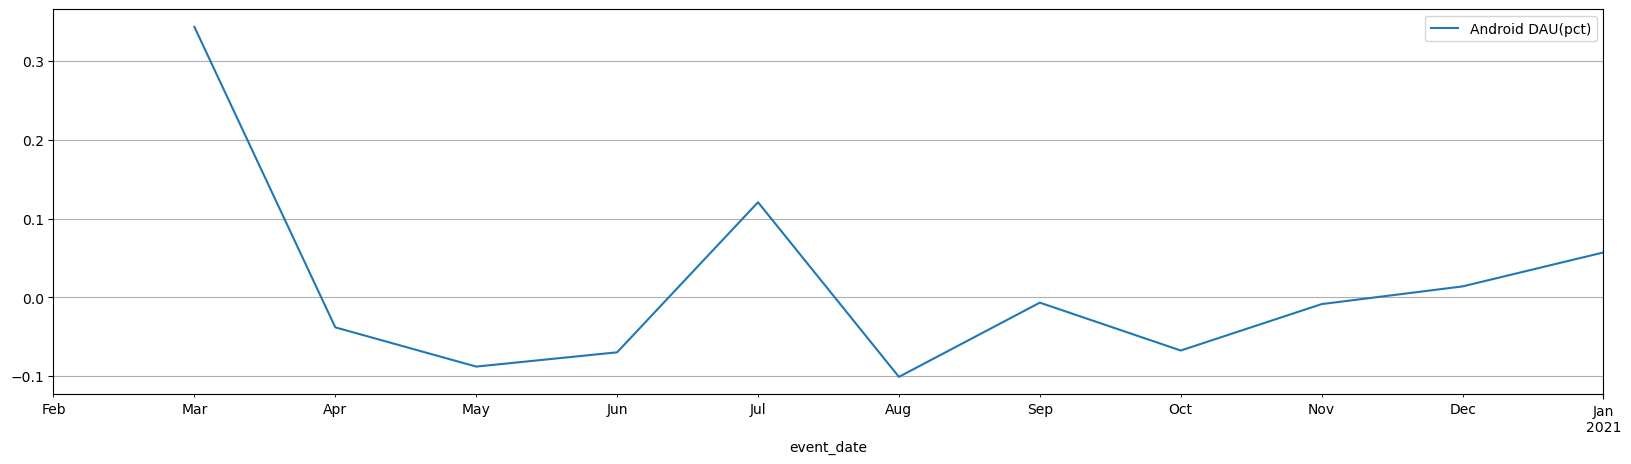

In [217]:
data_monthly[['Android DAU(pct)']].plot(figsize=(20,5))
plt.grid(True)

In [218]:
data_monthly

,Android DAU,Apple DAU,Android installs,Apple installs,Android IAP,Apple iAP,Android DAU(pct),Apple DAU(pct)
event_date,,,,,,,,
2020-02-29,319618.648276,295615.458621,1250609.5,688867.2,2581095.0,6723387.60,NaN,NaN
2020-03-31,429316.541935,305261.303226,2594833.5,697877.1,3193806.0,8583826.20,0.343215,0.032630
2020-04-30,413043.093333,277208.730000,1957455.5,541344.6,2824782.4,6384990.78,-0.037905,-0.091897
2020-05-31,376833.445161,270917.129032,1674760.5,576225.9,2448102.6,6327327.14,-0.087666,-0.022696
2020-06-30,350617.386667,260290.530000,1402005.5,556896.6,2458328.4,6580056.40,-0.069569,-0.039225
2020-07-31,392962.787097,258283.480645,2174819.5,574230.6,2313300.6,5480158.84,0.120774,-0.007711
2020-08-31,353379.612903,236682.609677,1351101.5,460282.5,2512374.6,5749746.25,-0.100730,-0.083632
2020-09-30,351057.920000,233996.400000,1491273.0,518853.6,3005724.9,7010652.46,-0.006570,-0.011349
2020-10-31,327436.077419,218535.909677,1337903.0,393292.8,3375662.0,8290427.41,-0.067288,-0.066071


# Forcasting with individual variable

## forcasting DAU
### choose models

- for `Android DAU(pct)`, we choose the AR(3) model. 

- for `Apple DAU(pct)`, we choose the AR(1) model. 

In [219]:
for i in range(1,6):
    model_Android_DAU_pct = AutoReg(data_monthly['Android DAU(pct)'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Android_DAU_pct.aic,model_Android_DAU_pct.bic))
    print(model_Android_DAU_pct.summary(),end='\n\n\n')

1:	 AIC:-20.625916952486346 	 BIC:-19.71816167350421
                            AutoReg Model Results                             
Dep. Variable:       Android DAU(pct)   No. Observations:                   11
Model:                     AutoReg(1)   Log Likelihood                  13.313
Method:               Conditional MLE   S.D. of innovations              0.064
Date:                Sun, 18 Dec 2022   AIC                            -20.626
Time:                        15:38:55   BIC                            -19.718
Sample:                    04-30-2020   HQIC                           -21.622
                         - 01-31-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0174      0.012     -1.424      0.155      -0.041       0.007
Android DAU(pct).L1    -0.1244      0.076     -1.63

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [220]:
# AR(3) model of Android DAU(pct)
model_Android_DAU_pct = AutoReg(data_monthly['Android DAU(pct)'].dropna(), lags=3).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Android_DAU_pct.aic,model_Android_DAU_pct.bic))
print(model_Android_DAU_pct.summary())

5:	 AIC:-17.45249570314487 	 BIC:-17.05528799474569
                            AutoReg Model Results                             
Dep. Variable:       Android DAU(pct)   No. Observations:                   11
Model:                     AutoReg(3)   Log Likelihood                  13.726
Method:               Conditional MLE   S.D. of innovations              0.044
Date:                Sun, 18 Dec 2022   AIC                            -17.452
Time:                        15:38:55   BIC                            -17.055
Sample:                    06-30-2020   HQIC                           -20.132
                         - 01-31-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0432      0.018     -2.412      0.016      -0.078      -0.008
Android DAU(pct).L1    -0.8600      0.288     -2.983

In [221]:
for i in range(1,5):
    model_Apple_DAU_pct = AutoReg(data_monthly['Apple DAU(pct)'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Apple_DAU_pct.aic,model_Apple_DAU_pct.bic))
    print(model_Apple_DAU_pct.summary(),end='\n\n\n')

1:	 AIC:-39.23910003367925 	 BIC:-38.33134475469711
                            AutoReg Model Results                             
Dep. Variable:         Apple DAU(pct)   No. Observations:                   11
Model:                     AutoReg(1)   Log Likelihood                  22.620
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Sun, 18 Dec 2022   AIC                            -39.239
Time:                        15:38:55   BIC                            -38.331
Sample:                    04-30-2020   HQIC                           -40.235
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0512      0.011     -4.870      0.000      -0.072      -0.031
Apple DAU(pct).L1    -0.5733      0.078     -7.353      0.

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [222]:
# AR(1) model of Apple DAU(pct)
model_Apple_DAU_pct = AutoReg(data_monthly['Apple DAU(pct)'].dropna(), lags=1).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print(model_Apple_DAU_pct.summary())

                            AutoReg Model Results                             
Dep. Variable:         Apple DAU(pct)   No. Observations:                   11
Model:                     AutoReg(1)   Log Likelihood                  22.620
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Sun, 18 Dec 2022   AIC                            -39.239
Time:                        15:38:55   BIC                            -38.331
Sample:                    04-30-2020   HQIC                           -40.235
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0512      0.011     -4.870      0.000      -0.072      -0.031
Apple DAU(pct).L1    -0.5733      0.078     -7.353      0.000      -0.726      -0.420
                        

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


### forcasting `Android DAU(pct)`

In [223]:
# a dictionary for saving forcasts
forcasts ={}

In [224]:
model_Android_DAU_pct.predict(start=11,end=22,dynamic=True)

forcasts.update({
    'Android DAU(pct)':model_Android_DAU_pct.predict(start=11,end=22,dynamic=True)
})

### forcasting `Apple DAU(pct)`

In [225]:
model_Apple_DAU_pct.predict(start=11,end=22,dynamic=True)
forcasts.update({
    'Apple DAU(pct)':model_Apple_DAU_pct.predict(start=11,end=22,dynamic=True)
})

### forcasting `DAUs`

In [226]:
DAU_forcast = (pd.DataFrame(forcasts)+1).cumprod()
DAU_forcast = DAU_forcast * np.array([348049.341935,214980.880645])
DAU_forcast.rename(columns={'Android DAU(pct)':'Android DAU(f)','Apple DAU(pct)':'Apple DAU(f)'},inplace=True)
DAU_forcast

,Android DAU(f),Apple DAU(f)
2021-02-28,314304.134705,204375.408303
2021-03-31,315226.522172,199685.345084
2021-04-30,311071.158066,192082.675097
2021-05-31,312116.275304,186434.940472
2021-06-30,299692.146929,180026.576001
2021-07-31,297951.042594,174351.465436
2021-08-31,292828.159832,168570.453270
2021-09-30,289895.884678,163138.977312
2021-10-31,283303.877622,157794.931458
2021-11-30,280050.168732,152674.503834


## forcasting Installs

In [227]:
data_monthly

,Android DAU,Apple DAU,Android installs,Apple installs,Android IAP,Apple iAP,Android DAU(pct),Apple DAU(pct)
event_date,,,,,,,,
2020-02-29,319618.648276,295615.458621,1250609.5,688867.2,2581095.0,6723387.60,NaN,NaN
2020-03-31,429316.541935,305261.303226,2594833.5,697877.1,3193806.0,8583826.20,0.343215,0.032630
2020-04-30,413043.093333,277208.730000,1957455.5,541344.6,2824782.4,6384990.78,-0.037905,-0.091897
2020-05-31,376833.445161,270917.129032,1674760.5,576225.9,2448102.6,6327327.14,-0.087666,-0.022696
2020-06-30,350617.386667,260290.530000,1402005.5,556896.6,2458328.4,6580056.40,-0.069569,-0.039225
2020-07-31,392962.787097,258283.480645,2174819.5,574230.6,2313300.6,5480158.84,0.120774,-0.007711
2020-08-31,353379.612903,236682.609677,1351101.5,460282.5,2512374.6,5749746.25,-0.100730,-0.083632
2020-09-30,351057.920000,233996.400000,1491273.0,518853.6,3005724.9,7010652.46,-0.006570,-0.011349
2020-10-31,327436.077419,218535.909677,1337903.0,393292.8,3375662.0,8290427.41,-0.067288,-0.066071


### forcasting Android installs
- AR(4)

In [228]:
for i in range(1,6):
    model_Android_installs = AutoReg(data_monthly['Android installs'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Android_installs.aic,model_Android_installs.bic))
    print(model_Android_installs.summary(),end='\n\n\n')

1:	 AIC:320.5397142288002 	 BIC:321.73340004719535
                            AutoReg Model Results                             
Dep. Variable:       Android installs   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                -157.270
Method:               Conditional MLE   S.D. of innovations         391727.296
Date:                Sun, 18 Dec 2022   AIC                            320.540
Time:                        15:38:56   BIC                            321.733
Sample:                    03-31-2020   HQIC                           319.787
                         - 01-31-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.763e+06   3.57e+05      4.933      0.000    1.06e+06    2.46e+06
Android installs.L1    -0.0555      0.147     -0.377 

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1
/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [229]:
model_Android_installs = AutoReg(data_monthly['Android installs'].dropna(), lags=3).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print(model_Android_installs.summary(),end='\n\n\n')

                            AutoReg Model Results                             
Dep. Variable:       Android installs   No. Observations:                   12
Model:                     AutoReg(3)   Log Likelihood                -124.451
Method:               Conditional MLE   S.D. of innovations         244985.090
Date:                Sun, 18 Dec 2022   AIC                            258.902
Time:                        15:38:56   BIC                            259.888
Sample:                    05-31-2020   HQIC                           256.774
                         - 01-31-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.563e+06   2.43e+05      6.435      0.000    1.09e+06    2.04e+06
Android installs.L1    -0.2109      0.118     -1.794      0.073      -0.441       0.019
Android installs

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [230]:
forcasts.update({
    'Android_installs(f)':model_Android_installs.predict(start=12,end=23,dynamic=True)
})

### forcasting Apple installs
- AR(1)

In [231]:
for i in range(1,6):
    model_Apple_installs = AutoReg(data_monthly['Apple installs'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Apple_installs.aic,model_Apple_installs.bic))
    print(model_Apple_installs.summary(),end='\n\n\n')

1:	 AIC:279.6541357303217 	 BIC:280.8478215487168
                            AutoReg Model Results                             
Dep. Variable:         Apple installs   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                -136.827
Method:               Conditional MLE   S.D. of innovations          61076.705
Date:                Sun, 18 Dec 2022   AIC                            279.654
Time:                        15:38:56   BIC                            280.848
Sample:                    03-31-2020   HQIC                           278.902
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.078e+05    4.6e+04      4.512      0.000    1.18e+05    2.98e+05
Apple installs.L1     0.5744      0.099      5.822      0.00

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1
/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [232]:
model_Apple_installs = AutoReg(data_monthly['Apple installs'].dropna(), lags=1).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print(model_Apple_installs.summary(),end='\n\n\n')

                            AutoReg Model Results                             
Dep. Variable:         Apple installs   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                -136.827
Method:               Conditional MLE   S.D. of innovations          61076.705
Date:                Sun, 18 Dec 2022   AIC                            279.654
Time:                        15:38:56   BIC                            280.848
Sample:                    03-31-2020   HQIC                           278.902
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.078e+05    4.6e+04      4.512      0.000    1.18e+05    2.98e+05
Apple installs.L1     0.5744      0.099      5.822      0.000       0.381       0.768
                        

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


In [233]:
forcasts.update({
    'Apple_installs(f)':model_Apple_installs.predict(start=12,end=23,dynamic=True)
})

## forcasting IAP

## forcasting Android IAP
- AR(2)

In [234]:
for i in range(1,6):
    model_Android_IAP = AutoReg(data_monthly['Android IAP'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Android_IAP.aic,model_Android_IAP.bic))
    print(model_Android_IAP.summary(),end='\n\n\n')

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


1:	 AIC:317.0376806708157 	 BIC:318.2313664892108
                            AutoReg Model Results                             
Dep. Variable:            Android IAP   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                -155.519
Method:               Conditional MLE   S.D. of innovations         334080.700
Date:                Sun, 18 Dec 2022   AIC                            317.038
Time:                        15:38:56   BIC                            318.231
Sample:                    03-31-2020   HQIC                           316.285
                         - 01-31-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.635e+06   4.06e+05      4.023      0.000    8.38e+05    2.43e+06
Android IAP.L1     0.4102      0.148      2.774      0.006       0.12

In [235]:
model_Android_IAP = AutoReg(data_monthly['Android IAP'].dropna(), lags=2).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print(model_Android_IAP.summary(),end='\n\n\n')

                            AutoReg Model Results                             
Dep. Variable:            Android IAP   No. Observations:                   12
Model:                     AutoReg(2)   Log Likelihood                -138.634
Method:               Conditional MLE   S.D. of innovations         253835.380
Date:                Sun, 18 Dec 2022   AIC                            285.268
Time:                        15:38:56   BIC                            286.478
Sample:                    04-30-2020   HQIC                           283.940
                         - 01-31-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.255e+06   3.55e+05      6.362      0.000    1.56e+06    2.95e+06
Android IAP.L1     0.6752      0.181      3.721      0.000       0.320       1.031
Android IAP.L2    -0.5037      0.160

In [236]:
forcasts.update({
    'Android_IAP(f)':model_Android_IAP.predict(start=12,end=23,dynamic=True)
})

## forcasting Apple IAP
- AR(3)

In [237]:
for i in range(1,6):
    model_Apple_IAP = AutoReg(data_monthly['Apple iAP'].dropna(), lags=i).fit(cov_type='HAC',cov_kwds={'maxlags':6})
    print('{}:\t AIC:{} \t BIC:{}'.format(i,model_Apple_IAP.aic,model_Apple_IAP.bic))
    print(model_Apple_IAP.summary(),end='\n\n\n')

/Users/yanyan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1


1:	 AIC:340.1680605431708 	 BIC:341.3617463615659
                            AutoReg Model Results                             
Dep. Variable:              Apple iAP   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                -167.084
Method:               Conditional MLE   S.D. of innovations         956005.327
Date:                Sun, 18 Dec 2022   AIC                            340.168
Time:                        15:38:56   BIC                            341.362
Sample:                    03-31-2020   HQIC                           339.416
                         - 01-31-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.949e+06   1.18e+06      4.188      0.000    2.63e+06    7.26e+06
Apple iAP.L1     0.2634      0.170      1.548      0.122      -0.070       

In [238]:
model_Apple_IAP = AutoReg(data_monthly['Apple iAP'].dropna(), lags=3).fit(cov_type='HAC',cov_kwds={'maxlags':6})
print(model_Apple_IAP.summary(),end='\n\n\n')

                            AutoReg Model Results                             
Dep. Variable:              Apple iAP   No. Observations:                   12
Model:                     AutoReg(3)   Log Likelihood                -132.553
Method:               Conditional MLE   S.D. of innovations         602706.439
Date:                Sun, 18 Dec 2022   AIC                            275.106
Time:                        15:38:56   BIC                            276.092
Sample:                    05-31-2020   HQIC                           272.978
                         - 01-31-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.703e+06   1.44e+06      4.656      0.000    3.88e+06    9.52e+06
Apple iAP.L1     0.5833      0.088      6.641      0.000       0.411       0.755
Apple iAP.L2    -0.4186      0.177     -2.36

In [239]:
forcasts.update({
    'Apple_IAP(f)':model_Apple_IAP.predict(start=12,end=23,dynamic=True)
})

# save results

In [243]:
AR_results = pd.DataFrame(forcasts)

In [245]:
AR_results[['Android DAU(pct)','Apple DAU(pct)']] = (AR_results[['Android DAU(pct)','Apple DAU(pct)']]+1)*np.array([348049.341900,214980.880600])

In [246]:
AR_results

,Android DAU(pct),Apple DAU(pct),Android_installs(f),Apple_installs(f),Android_IAP(f),Apple_IAP(f)
2021-02-28,314304.134673,204375.408260,1.459324e+06,468633.038883,2.725700e+06,6.226566e+06
2021-03-31,349070.761333,210047.440079,1.556605e+06,476956.955634,2.804281e+06,6.870182e+06
2021-04-30,343461.302378,206795.859871,1.497907e+06,481738.596051,2.775800e+06,7.153577e+06
2021-05-31,349218.696106,208659.878654,1.526882e+06,484485.390111,2.716991e+06,6.986026e+06
2021-06-30,334194.858662,207591.300977,1.510656e+06,486063.274885,2.691630e+06,6.664904e+06
2021-07-31,346027.299534,208203.879703,1.519041e+06,486969.684431,2.704127e+06,6.501609e+06
2021-08-31,342065.083686,207852.709448,1.514483e+06,487490.367741,2.725338e+06,6.568060e+06
2021-09-30,344564.101825,208054.023243,1.516882e+06,487789.472169,2.733365e+06,6.727446e+06
2021-10-31,340134.970434,207938.616988,1.515593e+06,487961.291502,2.728101e+06,6.819175e+06
2021-11-30,344052.039614,208004.775414,1.516277e+06,488059.992425,2.720505e+06,6.795142e+06


In [248]:
AR_results.to_csv('AR_prediction.csv')

In [250]:
data_monthly.to_csv('Genshin_Impact_monthly.csv')